# NetworkX Graphs
# 1. Graph Types

[1. Undirected Graphs](#1)

[1a. Bipartite Graphs](#1a)

[1b. Examples of Undirected Graphs](#1b)

[1c. Coloring](#1c)

[2. Directed Graphs](#2)

[3. Trees](#3)

[3.1 Undirected Trees](#3.1)

[3.2 Directed Trees](#3.2)

[4. Weighted Graphs](#4)

[5. Multigraphs](#5)

[5.1 Undirected Multigraphs](#5.1)

[5.2 Directed Multigraphs](#5.2)

[6. Graph Isomorphisms](#6)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import random
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.drawing.nx_agraph import to_agraph 
from IPython.display import Image
from IPython.core.display import HTML 
from netwulf import visualize

<a id='1'></a>
## 1. Undirected Graphs

In [2]:
# Empty Graph

G = nx.Graph()

In [3]:
# Add edges (links) from list ([ , , , ])

G.add_edges_from([(0,1),(1,2),(1,4),(2,3),(3,4),(0,4)])

In [4]:
# List of vertices (nodes) and their size

print G.nodes()
print len(G.nodes())

[0, 1, 2, 3, 4]
5


In [5]:
# List of edges (links) and their size

print G.edges()
print len(G.edges())

[(0, 1), (0, 4), (1, 2), (1, 4), (2, 3), (3, 4)]
6


In [6]:
# Graph type

print type(G)
G.is_directed()

<class 'networkx.classes.graph.Graph'>


False

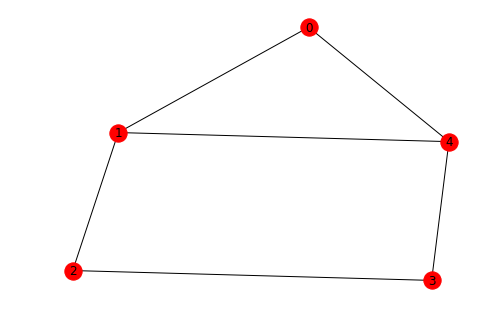

In [7]:
# Graph plot

nx.draw(G,with_labels=True)
# nx.draw(G,with_labels=True,node_color="b",edge_color="g")

Colors:

* Red: "red" or "r"
* Blue: "blue" or "b"
* Green: "green" or "g"

Color Picker: 
https://www.w3schools.com/colors/colors_picker.asp

* Light red: "#ffb3b3"
* Light green: "#b3ffb3"
* Light blue: "#b3ecff"

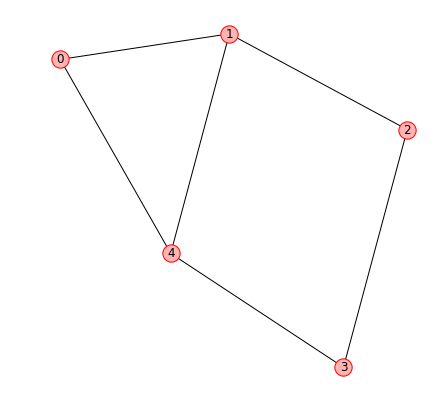

In [8]:
figsize=(7,7)
pos = nx.spring_layout(G)
node_color="#ffb3b3"
edge_color="k"
node_border_color="r"

plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color)
# If you do not to display node labels, just comment off the following line:
nx.draw_networkx_labels(G, pos)
plt.axis('off');

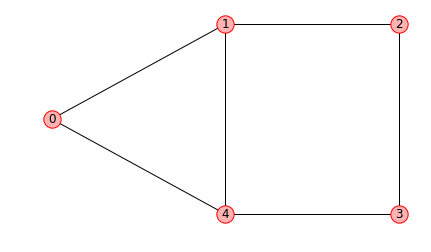

In [9]:
# Graph plot with predifined layout of nodes

figsize=(7,4)
pos1={
    0:(0,1),
    1:(1,2),
    2:(2,2),
    3:(2,0),
    4:(1,0)
}
pos=pos1
node_color="#ffb3b3"
edge_color="k"
node_border_color="r"

plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color)
# If you do not to display node labels, just comment off the following line:
nx.draw_networkx_labels(G, pos)
plt.axis('off');

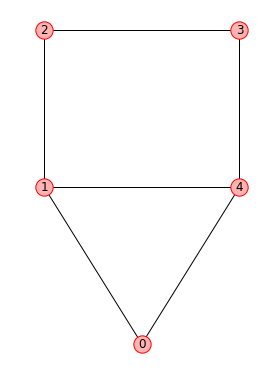

In [10]:
# Another predefined layout

figsize=(4,6.5)
pos2={
    0:(1,0),
    1:(0,1),
    2:(0,2),
    3:(2,2),
    4:(2,1)
}
pos=pos2
node_color="#ffb3b3"
edge_color="k"
node_border_color="r"

plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color)
# If you do not to display node labels, just comment off the following line:
nx.draw_networkx_labels(G, pos)
plt.axis('off');

<a id='1a'></a>
### 1a. Bipartite Graphs

* **A graph is bipartite if its nodes are partitioned in two sets and there are no links inside each set.**
* **A graph is bipartite if and only if it does not contain any odd-length cycles.**
* **Every tree is bipartite**
* **A bipartite graph is tree if and only if it does not contain any even-length cycles.**

In [11]:
H=nx.Graph()
H.add_edges_from([(1,"a"),(1,"c"),(1,"d"),(2,"b"),(2,"c"),(3,"d")])

print H.nodes(), len(H.nodes())
print H.edges(), len(H.edges())

print "Is H directed?", H.is_directed()
print "Is H bipartite?", nx.is_bipartite(H)
print "Is H tree?", nx.is_tree(H)

['a', 1, 'c', 'b', 'd', 2, 3] 7
[('a', 1), (1, 'c'), (1, 'd'), ('c', 2), ('b', 2), ('d', 3)] 6
Is H directed? False
Is H bipartite? True
Is H tree? True


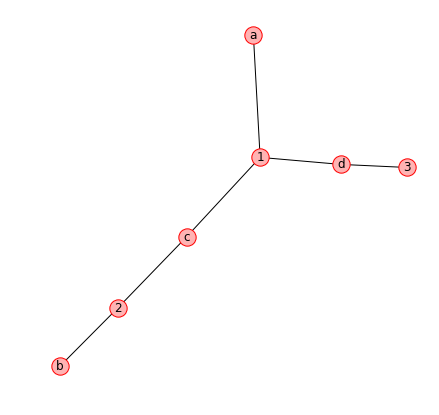

In [12]:
figsize=(7,7)
pos = nx.spring_layout(H)
node_color="#ffb3b3"
edge_color="k"
node_border_color="r"

G=H
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color)
# If you do not to display node labels, just comment off the following line:
nx.draw_networkx_labels(G, pos)
plt.axis('off');

In [13]:
H.add_edge(1,"b")

print H.nodes(), len(H.nodes())
print H.edges(), len(H.edges())

print "Is H directed?", H.is_directed()
print "Is H bipartite?", nx.is_bipartite(H)
print "Is H tree?", nx.is_tree(H)

['a', 1, 'c', 'b', 'd', 2, 3] 7
[('a', 1), (1, 'c'), (1, 'b'), (1, 'd'), ('c', 2), ('b', 2), ('d', 3)] 7
Is H directed? False
Is H bipartite? True
Is H tree? False


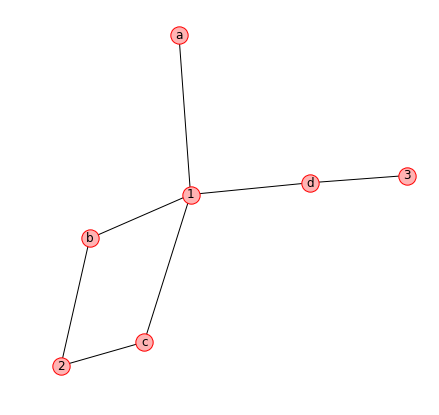

In [14]:
figsize=(7,7)
pos = nx.spring_layout(H)
node_color="#ffb3b3"
edge_color="k"
node_border_color="r"

G=H
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color)
# If you do not to display node labels, just comment off the following line:
nx.draw_networkx_labels(G, pos)
plt.axis('off');

In [15]:
from networkx.algorithms import bipartite
first_group, second_group = bipartite.sets(H)
print "First group of nodes:", list(second_group)
print "Second group of nodes:", sorted(list(first_group))

First group of nodes: [1, 2, 3]
Second group of nodes: ['a', 'b', 'c', 'd']


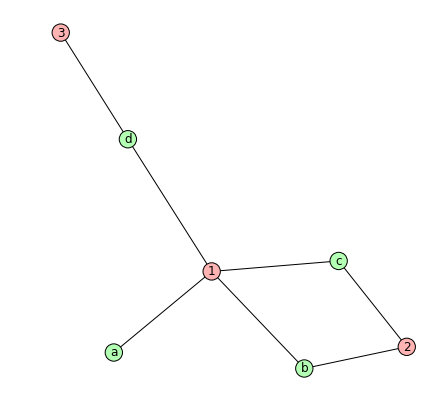

In [16]:
bipartition_colors={1:"#ffb3b3",2:"#ffb3b3",3:"#ffb3b3",'a':"#b3ffb3",'b':"#b3ffb3",'c':"#b3ffb3",'d':"#b3ffb3"}

figsize=(7,7)
pos = nx.spring_layout(H)
node_color=[bipartition_colors[n] for n in H.nodes()]
edge_color="k"
node_border_color="k"

G=H
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color)
# If you do not to display node labels, just comment off the following line:
nx.draw_networkx_labels(G, pos)
plt.axis('off');

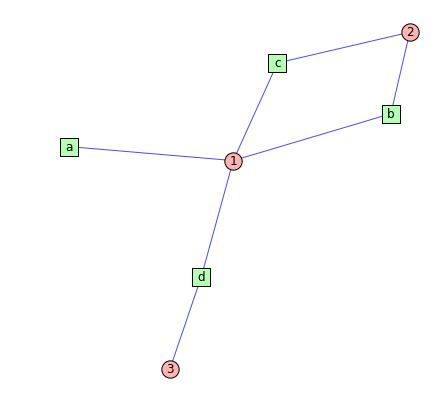

In [17]:
figsize=(7,7)
pos = nx.spring_layout(H)

plt.figure(figsize=figsize);
nodes1 = nx.draw_networkx_nodes(H, pos, nodelist=list(second_group),node_color="#ffb3b3",node_shape='o')
nodes2 = nx.draw_networkx_nodes(H, pos, nodelist=list(first_group),node_color="#b3ffb3",node_shape='s')
nodes1.set_edgecolor('k')
nodes2.set_edgecolor('k')
nx.draw_networkx_edges(H, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(H, pos)
plt.axis('off');

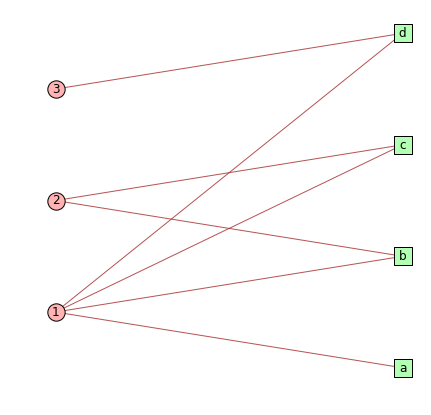

In [18]:
figsize=(7,7)
pos3={1:(0,0.5),2:(0,1.5),3:(0,2.5),'a':(1,0),'b':(1,1),'c':(1,2),'d':(1,3)}
pos=pos3

plt.figure(figsize=figsize);
nodes1 = nx.draw_networkx_nodes(H, pos, nodelist=list(second_group),node_color="#ffb3b3",node_shape='o')
nodes2 = nx.draw_networkx_nodes(H, pos, nodelist=list(first_group),node_color="#b3ffb3",node_shape='s')
nodes1.set_edgecolor('k')
nodes2.set_edgecolor('k')
nx.draw_networkx_edges(H, pos, edge_color="brown", alpha=0.8)
nx.draw_networkx_labels(H, pos)
plt.axis('off');

<a id='1b'></a>
### 1b. Examples of Undirected Graphs

10 nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
15 edges


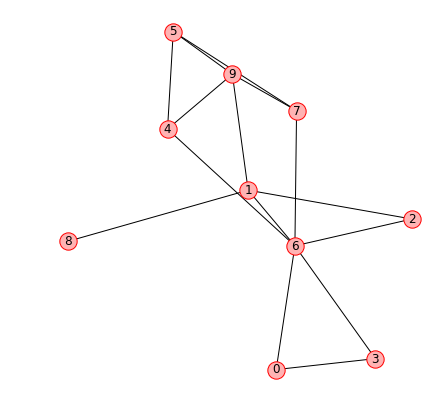

In [19]:
# Networkx graph generators: 
# https://networkx.github.io/documentation/networkx-2.0/reference/generators.html

number_of_nodes = 10
number_of_edges = 15

# G=nx.gnm_random_graph(number_of_nodes,number_of_edges)

while True:
    G=nx.gnm_random_graph(number_of_nodes,number_of_edges)  
    if nx.number_connected_components(G)==1:
        break

print len(G.nodes()), 'nodes:', G.nodes() 
print len(G.edges()), 'edges' #G.edges(), 

figsize=(7,7)
pos = nx.spring_layout(G)
node_color="#ffb3b3"
edge_color="k"
node_border_color="r"

plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color)
# If you do not to display node labels, just comment off the following line:
nx.draw_networkx_labels(G, pos)
plt.axis('off');

15 nodes: ['Strozzi', 'Tornabuoni', 'Medici', 'Albizzi', 'Guadagni', 'Pazzi', 'Acciaiuoli', 'Bischeri', 'Peruzzi', 'Ginori', 'Salviati', 'Castellani', 'Lamberteschi', 'Ridolfi', 'Barbadori']
20 edges


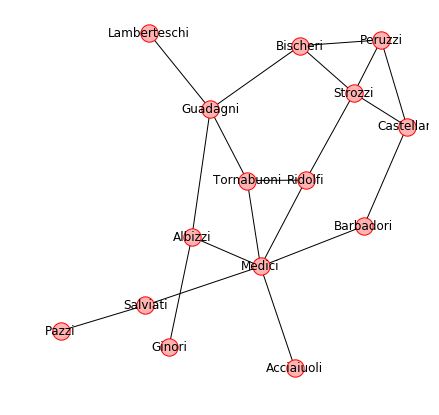

In [20]:
G=nx.florentine_families_graph()

print len(G.nodes()), 'nodes:', G.nodes() 
print len(G.edges()), 'edges' #G.edges(), 

figsize=(7,7)
pos = nx.spring_layout(G)
node_color="#ffb3b3"
edge_color="k"
node_border_color="r"

plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color)
# If you do not to display node labels, just comment off the following line:
nx.draw_networkx_labels(G, pos)
plt.axis('off');

34 nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
78 edges


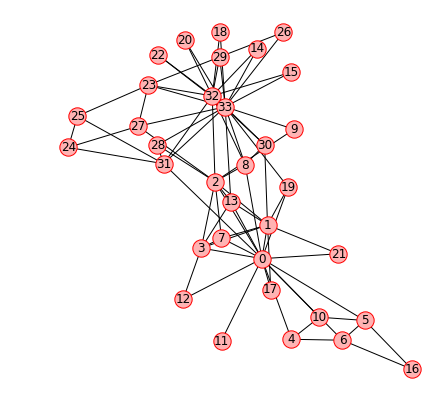

In [21]:
G=nx.karate_club_graph()

print len(G.nodes()), 'nodes:', G.nodes() 
print len(G.edges()), 'edges' #G.edges(), 

figsize=(7,7)
pos = nx.spring_layout(G)
node_color="#ffb3b3"
edge_color="k"
node_border_color="r"

plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color)
# If you do not to display node labels, just comment off the following line:
nx.draw_networkx_labels(G, pos)
plt.axis('off');

10 nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
18 edges


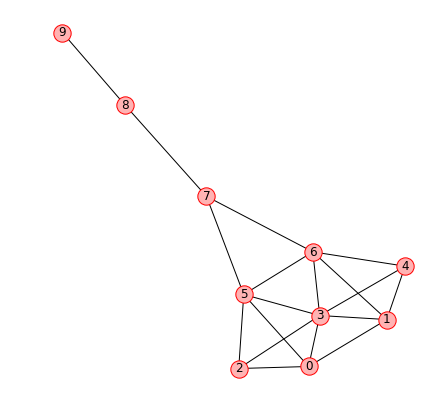

In [22]:
G=nx.krackhardt_kite_graph()

print len(G.nodes()), 'nodes:', G.nodes() 
print len(G.edges()), 'edges' #G.edges(), 

figsize=(7,7)
pos = nx.spring_layout(G)
node_color="#ffb3b3"
edge_color="k"
node_border_color="r"

plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color)
# If you do not to display node labels, just comment off the following line:
nx.draw_networkx_labels(G, pos)
plt.axis('off');

18 women:
['Theresa Anderson', 'Helen Lloyd', 'Flora Price', 'Katherina Rogers', 'Nora Fayette', 'Sylvia Avondale', 'Verne Sanderson', 'Olivia Carleton', 'Eleanor Nye', 'Brenda Rogers', 'Frances Anderson', 'Dorothy Murchison', 'Ruth DeSand', 'Laura Mandeville', 'Evelyn Jefferson', 'Charlotte McDowd', 'Myra Liddel', 'Pearl Oglethorpe']
14 events:
['E11', 'E10', 'E13', 'E12', 'E14', 'E9', 'E8', 'E5', 'E4', 'E7', 'E6', 'E1', 'E3', 'E2']
89 edges (associations women-events)


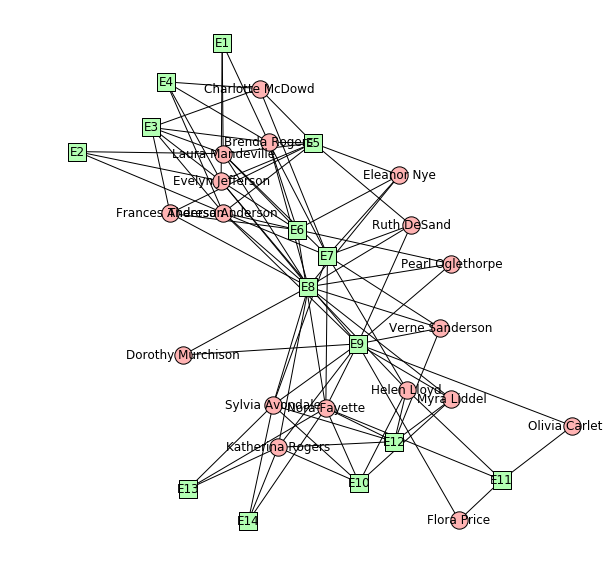

In [23]:
G=nx.davis_southern_women_graph()

from networkx.algorithms import bipartite
women=list(bipartite.sets(G)[0])
events=list(bipartite.sets(G)[1])
print len(women), 'women:'
print women
print len(events), 'events:'
print events
print len(G.edges()), 'edges (associations women-events)'

plt.figure(figsize=(10,10));
pos = nx.spring_layout(G)
nodes1 = nx.draw_networkx_nodes(G, pos, nodelist=women,node_color="#ffb3b3",node_shape='o')
nodes2 = nx.draw_networkx_nodes(G, pos, nodelist=events,node_color="#b3ffb3",node_shape='s')
nodes1.set_edgecolor('k')
nodes2.set_edgecolor('k')
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

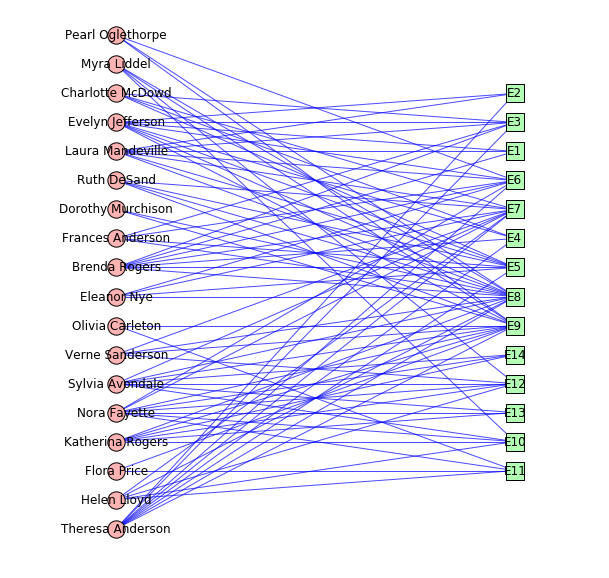

In [24]:
plt.figure(figsize=(10,10));
posdw={}
for i,n in enumerate(women):
    posdw[n]=(0,i)
for i,n in enumerate(events):
    posdw[n]=(1,2+i)
pos=posdw

H=G
nodes1 = nx.draw_networkx_nodes(H, pos, nodelist=women,node_color="#ffb3b3",node_shape='o')
nodes2 = nx.draw_networkx_nodes(H, pos, nodelist=events,node_color="#b3ffb3",node_shape='s')
nodes1.set_edgecolor('k')
nodes2.set_edgecolor('k')
nx.draw_networkx_edges(H, pos,edge_color='b',alpha=0.7)
# yoffset = {}
# y_off = -0.3  # offset on the y axis
# for k, v in pos.items():
#     yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(H, pos) #yoffset)
plt.xlim(-0.2,1.2)
plt.axis('off');

<a id='1c'></a>
### 1c. Coloring

Chromatic number = 3


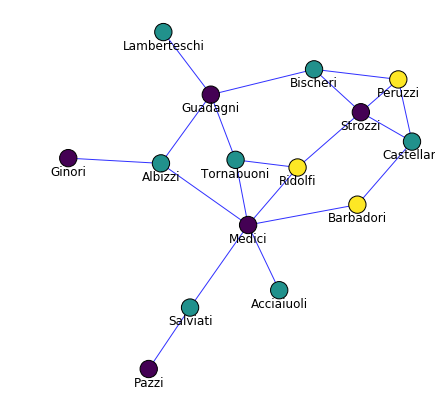

In [25]:
G=nx.florentine_families_graph()

d = nx.coloring.greedy_color(G, strategy='largest_first')
print 'Chromatic number =', len(set(d.values()))

plt.figure(figsize=(7,7));
pos = nx.spring_layout(G)
node_color=[d[n] for n in G.nodes()]
node_border_color='k'
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos,edge_color='b',alpha=0.8)
plt.axis('off');
yoffset = {}
y_off = -0.07  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G, yoffset);

Chromatic number = 5


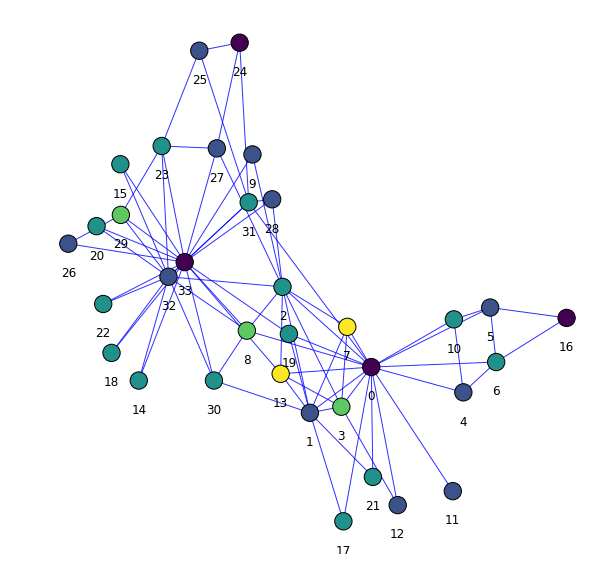

In [26]:
G=nx.karate_club_graph()

d = nx.coloring.greedy_color(G, strategy='largest_first')
print 'Chromatic number =', len(set(d.values()))

plt.figure(figsize=(10,10));
pos = nx.spring_layout(G)
node_color=[d[n] for n in G.nodes()]
node_border_color='k'
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos,edge_color='b',alpha=0.8)
plt.axis('off');
yoffset = {}
y_off = -0.06  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G, yoffset);

Chromatic number = 2


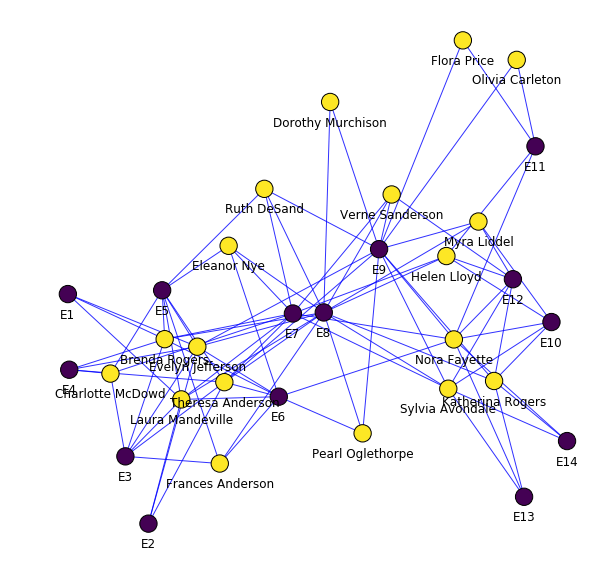

In [27]:
G=nx.davis_southern_women_graph()

d = nx.coloring.greedy_color(G, strategy='largest_first')
print 'Chromatic number =', len(set(d.values()))

plt.figure(figsize=(10,10));
pos = nx.spring_layout(G)
node_color=[d[n] for n in G.nodes()]
node_border_color='k'
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color) 
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos,edge_color='b',alpha=0.8)
plt.axis('off');
yoffset = {}
y_off = -0.06  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G, yoffset);

Chromatic number = 4


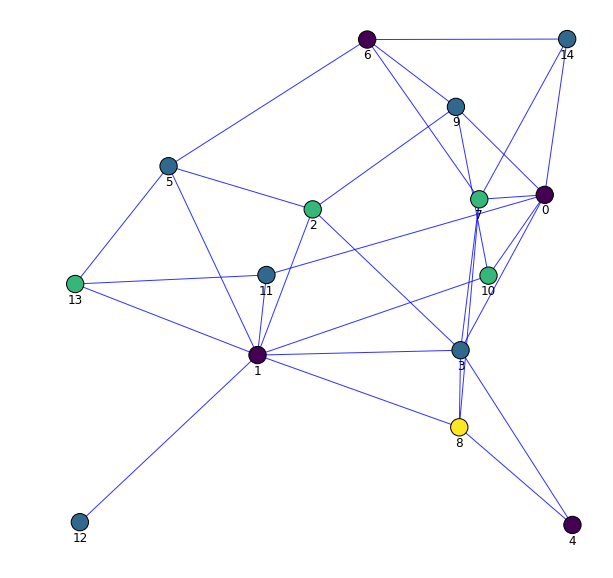

In [28]:
number_of_nodes = 15
number_of_edges = 30

# G=nx.gnm_random_graph(number_of_nodes,number_of_edges)

while True:
    G=nx.gnm_random_graph(number_of_nodes,number_of_edges)  
    d = nx.coloring.greedy_color(G, strategy='largest_first')
    if nx.number_connected_components(G)==1: 
        break
        
# d = nx.coloring.greedy_color(G, strategy='largest_first')
print 'Chromatic number =', len(set(d.values()))

plt.figure(figsize=(10,10));
pos = nx.spring_layout(G)
node_color=[d[n] for n in G.nodes()]
node_border_color='k'
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color) 
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos,edge_color='b',alpha=0.8)
plt.axis('off');
yoffset = {}
y_off = -0.06  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G, yoffset);

<a id='2'></a>
## 2. Directed Graphs

7 nodes: [0, 1, 2, 3, 4, 5, 6]
15 edges
Is G directed? True
Is G bipartite? False
Is G tree? False


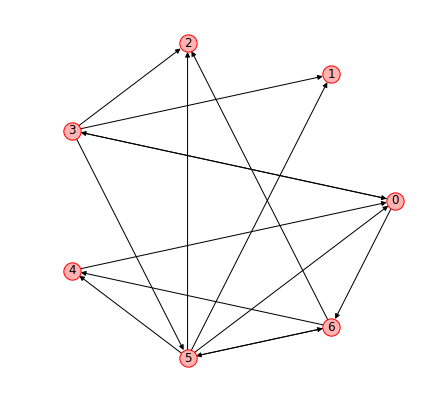

In [29]:
number_of_nodes = 7
number_of_edges = 15

# G=nx.gnm_random_graph(number_of_nodes,number_of_edges,directed=True)

while True:
    G=nx.gnm_random_graph(number_of_nodes,number_of_edges,directed=True)  
    if nx.number_weakly_connected_components(G)==1:
        break

print len(G.nodes()), 'nodes:', G.nodes() 
print len(G.edges()), 'edges' #G.edges(), 

print "Is G directed?", G.is_directed()
print "Is G bipartite?", nx.is_bipartite(G)
print "Is G tree?", nx.is_tree(G)

figsize=(7,7)
pos = nx.circular_layout(G) #nx.spring_layout(G)
# Notice that puting large values of k in the spring layout results 
# (an approximation to) the circular layout:
# pos = nx.spring_layout(G,k=100)
node_color="#ffb3b3"
edge_color="k"
node_border_color="r"

plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color)
# If you do not to display node labels, just comment off the following line:
nx.draw_networkx_labels(G, pos)
plt.axis('off');

6 nodes: [0, 1, 2, 3, 4, 5]
8 edges
Is G directed? True
Is G bipartite? False
Is G tree? False


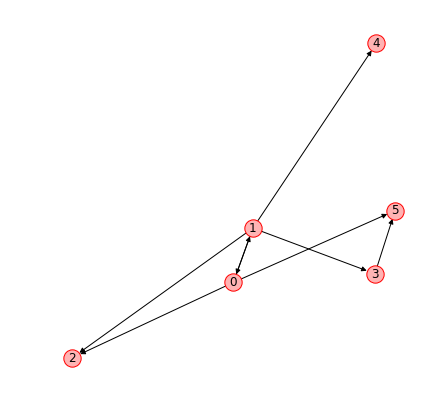

In [30]:
G=nx.DiGraph()
G.add_edges_from([(0,1),(0,2),(0,5),(1,0),(1,2),(1,3),(1,4),(3,5)])

print len(G.nodes()), 'nodes:', G.nodes() 
print len(G.edges()), 'edges' #G.edges(), 

print "Is G directed?", G.is_directed()
print "Is G bipartite?", nx.is_bipartite(G)
print "Is G tree?", nx.is_tree(G)

figsize=(7,7)
pos = nx.spring_layout(G) # nx.circular_layout(G) 
# Notice that puting large values of k in the spring layout results 
# (an approximation to) the circular layout:
# pos = nx.spring_layout(G,k=100)
node_color="#ffb3b3"
edge_color="k"
node_border_color="r"

plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color)
# If you do not to display node labels, just comment off the following line:
nx.draw_networkx_labels(G, pos)
plt.axis('off');

6 nodes: [0, 1, 2, 3, 4, 5]
5 edges
Is G directed? True
Is G bipartite? True
Is G tree? True


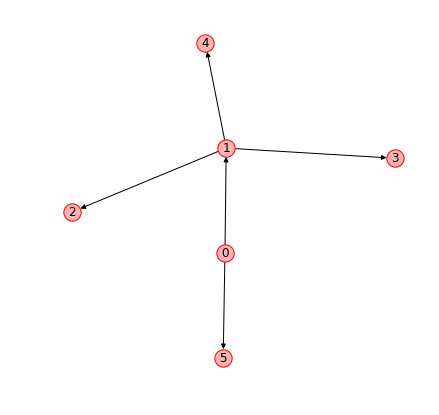

In [31]:
G=nx.DiGraph()
G.add_edges_from([(0,1),(0,5),(1,2),(1,3),(1,4)])

print len(G.nodes()), 'nodes:', G.nodes() 
print len(G.edges()), 'edges' #G.edges(), 

print "Is G directed?", G.is_directed()
print "Is G bipartite?", nx.is_bipartite(G)
print "Is G tree?", nx.is_tree(G)

figsize=(7,7)
pos = nx.spring_layout(G) # nx.circular_layout(G) 
# Notice that puting large values of k in the spring layout results 
# (an approximation to) the circular layout:
# pos = nx.spring_layout(G,k=100)
node_color="#ffb3b3"
edge_color="k"
node_border_color="r"

plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color)
# If you do not to display node labels, just comment off the following line:
nx.draw_networkx_labels(G, pos)
plt.axis('off');

10 nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
20 edges: [(0, 1), (0, 6), (0, 7), (1, 4), (2, 3), (2, 5), (2, 6), (3, 0), (3, 2), (4, 8), (4, 2), (4, 7), (5, 7), (7, 4), (8, 9), (8, 3), (8, 6), (8, 7), (9, 5), (9, 7)] Is G directed? True
Is G bipartite? False
Is G tree? False


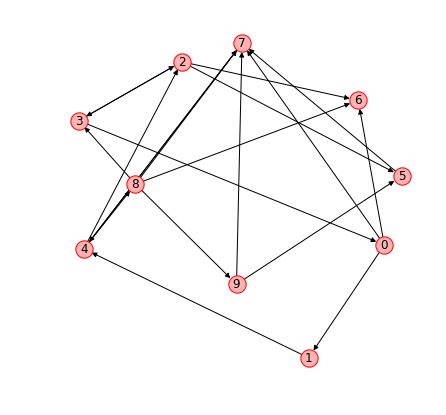

In [32]:
number_of_nodes = 10
number_of_edges = 20

# G=nx.gnm_random_graph(number_of_nodes,number_of_edges,directed=True)

while True:
    G=nx.gnm_random_graph(number_of_nodes,number_of_edges,directed=True)  
    if nx.number_weakly_connected_components(G)==1:
        break

print len(G.nodes()), 'nodes:', G.nodes() 
print len(G.edges()), 'edges:', G.edges(), 

print "Is G directed?", G.is_directed()
print "Is G bipartite?", nx.is_bipartite(G)
print "Is G tree?", nx.is_tree(G)

figsize=(7,7)
pos = nx.spring_layout(G,k=2) # nx.circular_layout(G) 
# Notice that puting large values of k in the spring layout results 
# (an approximation to) the circular layout:
# pos = nx.spring_layout(G,k=100)
node_color="#ffb3b3"
edge_color="k"
node_border_color="r"

plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color)
# If you do not to display node labels, just comment off the following line:
nx.draw_networkx_labels(G, pos)
plt.axis('off');

Parameters of spring layout:

https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html

In [33]:
# Reciprocating edges

rece=[]
for e in G.edges():
    if (e[1],e[0]) in G.edges():
        if (e[1],e[0]) not in rece:
            rece.append(e)

print len(rece), "reciprocating edges:"           
rece

2 reciprocating edges:


[(2, 3), (4, 7)]

10 nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
20 edges
Is G directed? True
Is G bipartite? False
Is G tree? False
5 reciprocating edges:
[(0, 2), (2, 5), (3, 5), (6, 9), (6, 7)]


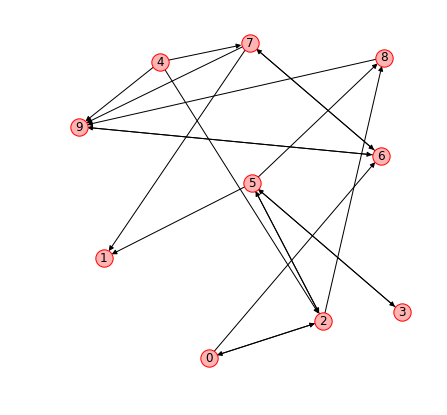

In [34]:
number_of_nodes = 10
number_of_edges = 20

# G=nx.gnm_random_graph(number_of_nodes,number_of_edges,directed=True)

while True:
    G=nx.gnm_random_graph(number_of_nodes,number_of_edges,directed=True)  
    rece=[]
    for e in G.edges():
        if (e[1],e[0]) in G.edges():
            if (e[1],e[0]) not in rece:
                rece.append(e)
    if nx.number_weakly_connected_components(G)==1 and len(rece)>4:
        break

print len(G.nodes()), 'nodes:', G.nodes() 
print len(G.edges()), 'edges' #G.edges(),

print "Is G directed?", G.is_directed()
print "Is G bipartite?", nx.is_bipartite(G)
print "Is G tree?", nx.is_tree(G)

rece=[]
for e in G.edges():
    if (e[1],e[0]) in G.edges():
        if (e[1],e[0]) not in rece:
            rece.append(e)
print len(rece), "reciprocating edges:"           
print rece

figsize=(7,7)
pos = nx.spring_layout(G,k=2) # nx.circular_layout(G) 
# Notice that puting large values of k in the spring layout results 
# (an approximation to) the circular layout:
# pos = nx.spring_layout(G,k=100)
node_color="#ffb3b3"
edge_color="k"
node_border_color="r"

plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color)
# If you do not to display node labels, just comment off the following line:
nx.draw_networkx_labels(G, pos)
plt.axis('off');

<a id='3'></a>
## 3. Trees

<a id='3.1'></a>
### 3.1 Undirected Trees

**An undirected graph is a tree if it is acyclic and connected.**

#### Balanced Tree

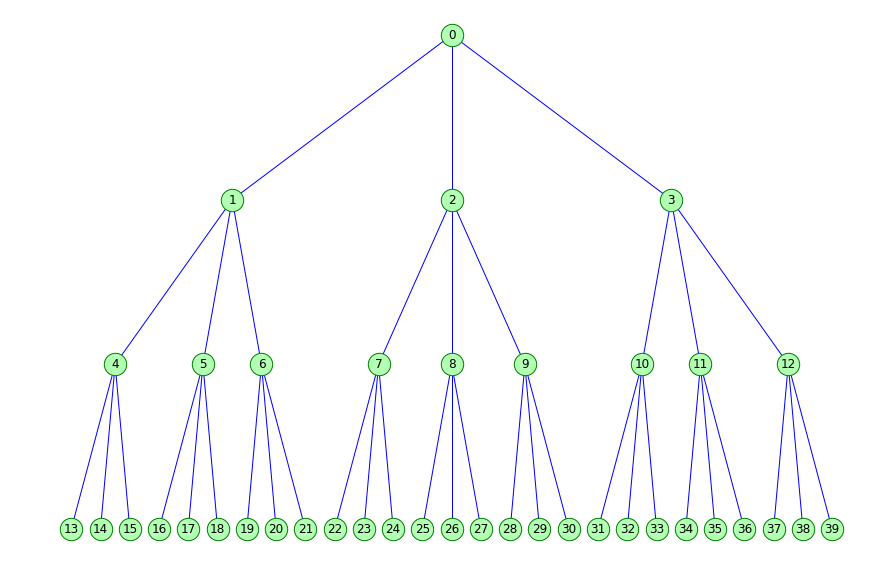

In [35]:
r=3
h=3
T=nx.balanced_tree(r, h)

plt.figure(figsize=(15,10));
pos=graphviz_layout(T, prog='dot')
node_color="#b3ffb3" #"#ffb3b3"
node_border_color='g' #'r'
edge_color="b" #"#668cff"
nodes = nx.draw_networkx_nodes(T, pos, node_color=node_color,node_size=500)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(T, pos, edge_color=edge_color)
nx.draw_networkx_labels(T, pos)
plt.axis('off');

#### Random Tree

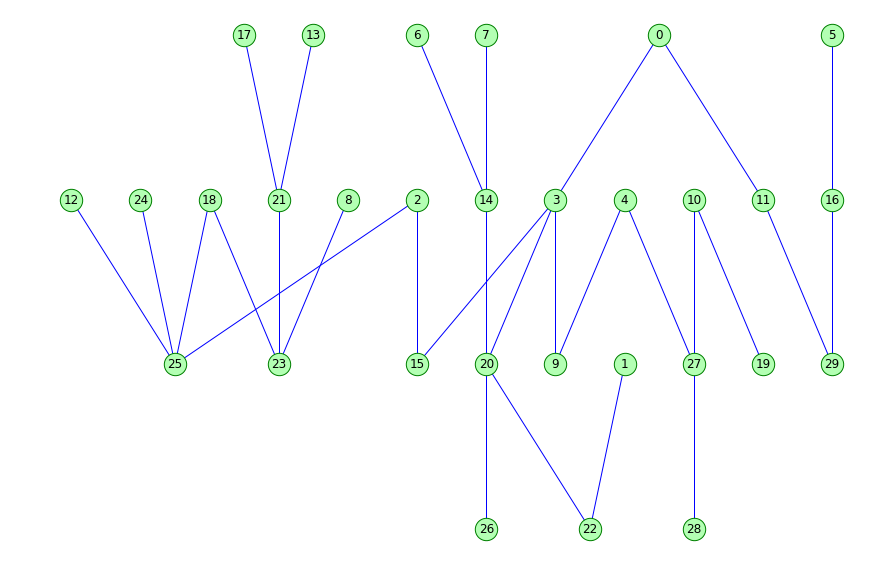

In [36]:
T=nx.random_tree(30)

plt.figure(figsize=(15,10));
pos=graphviz_layout(T, prog='dot')
node_color="#b3ffb3" #"#ffb3b3"
node_border_color='g' #'r'
edge_color="b" #"#668cff"
nodes = nx.draw_networkx_nodes(T, pos, node_color=node_color,node_size=500)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(T, pos, edge_color=edge_color)
nx.draw_networkx_labels(T, pos)
plt.axis('off');

#### Random Power Law Tree

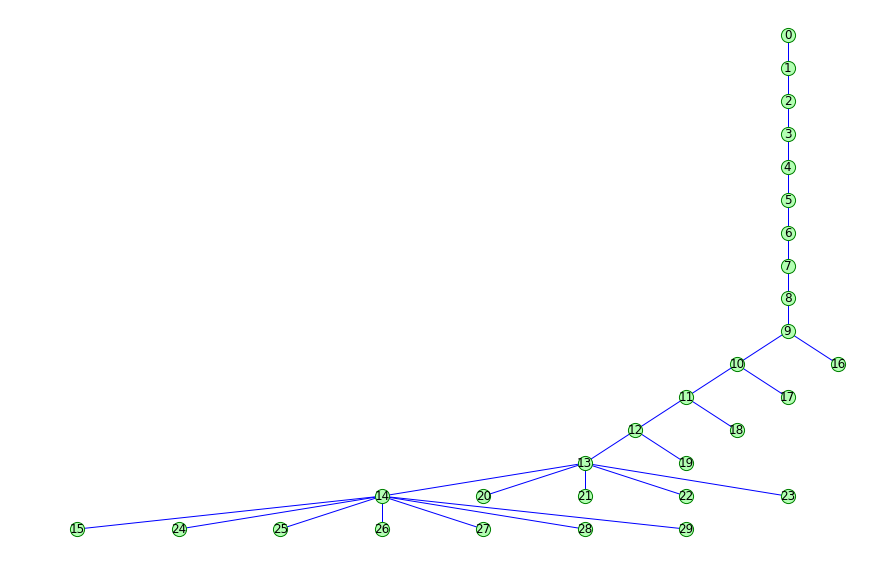

In [37]:
T=nx.random_powerlaw_tree(30,tries=1000)

plt.figure(figsize=(15,10));
pos=graphviz_layout(T, prog='dot')
node_color="#b3ffb3" #"#ffb3b3"
node_border_color='g' #'r'
edge_color="b" #"#668cff"
nodes = nx.draw_networkx_nodes(T, pos, node_color=node_color,node_size=200)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(T, pos, edge_color=edge_color)
nx.draw_networkx_labels(T, pos)
plt.axis('off');

<a id='3.2'></a>
### 3.2 Directed Trees

**A directed tree is a directed graph which would be a tree if the directions on the edges were ignored. In other words, a directed tree is a weakly connected directed graph such that the underlying undirected graph is a tree.**

Directed tree
Not arborescence


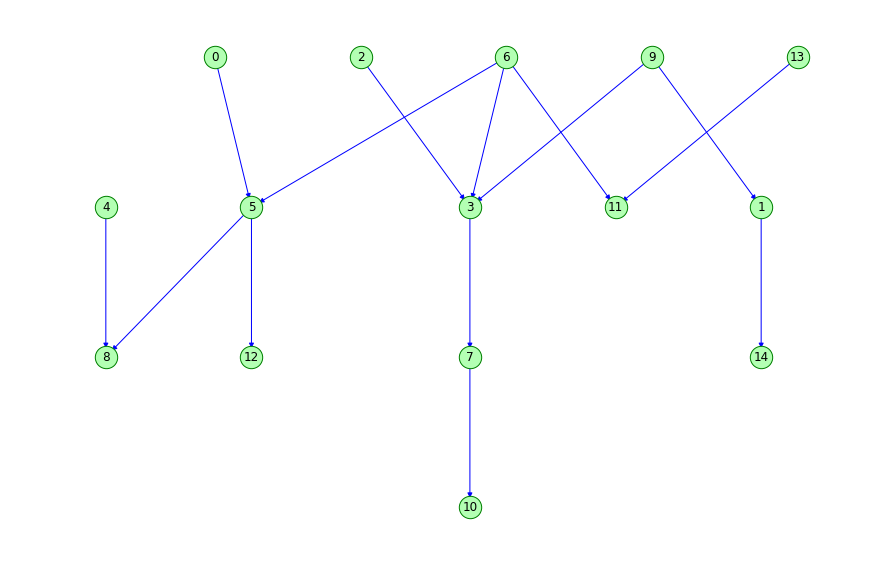

In [38]:
while True:
    T=nx.random_tree(15)
    S=nx.DiGraph()   
    eds = list(T.edges())
    for _ in range(5):
        e=random.choice(eds)
        for n, i in enumerate(eds):
            if i == e:
                eds[n] = (e[1],e[0])
    S.add_edges_from(eds)
    if nx.is_weakly_connected(S)==True:
        print "Directed tree"
        break
if nx.is_arborescence(S)==True:
    print "Arborescence"
else:
    print "Not arborescence"

plt.figure(figsize=(15,10));
pos=graphviz_layout(S, prog='dot')
node_color="#b3ffb3" #"#ffb3b3"
node_border_color='g' #'r'
edge_color="b" #"#668cff"
nodes = nx.draw_networkx_nodes(S, pos, node_color=node_color,node_size=500)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(S, pos, edge_color=edge_color)
nx.draw_networkx_labels(S, pos)
plt.axis('off');

#### Arborescences

**An arborescence is a directed graph in which there is a unique vertex u called root such that, for any other vertex v, there is exactly one directed path from u to v.**

Arborescence


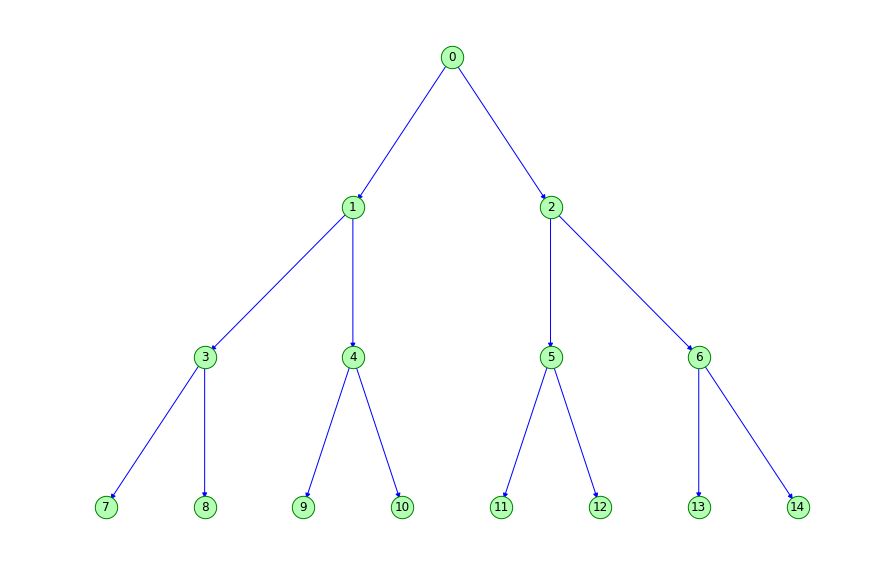

In [39]:
T=nx.balanced_tree(2, 3)
S=nx.DiGraph()
S.add_edges_from(T.edges())
if nx.is_arborescence(S)==True:
    print "Arborescence"
    
plt.figure(figsize=(15,10));
pos=graphviz_layout(S, prog='dot')
node_color="#b3ffb3" #"#ffb3b3"
node_border_color='g' #'r'
edge_color="b" #"#668cff"
nodes = nx.draw_networkx_nodes(S, pos, node_color=node_color,node_size=500)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(S, pos, edge_color=edge_color)
nx.draw_networkx_labels(S, pos)
plt.axis('off');

Arborescence


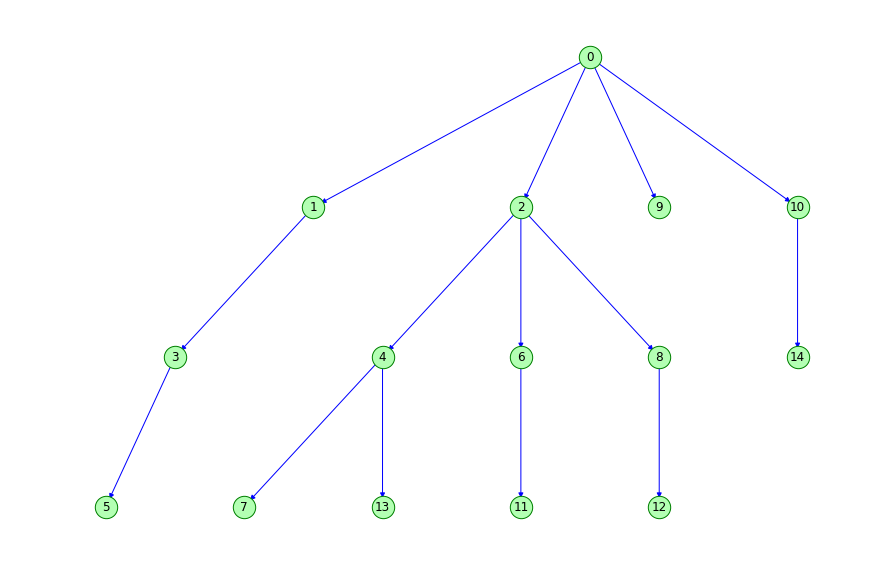

In [40]:
T = nx.read_gpickle("RandomTree15Arborescence.gpickle")
S=nx.DiGraph()
S.add_edges_from(T.edges())
if nx.is_arborescence(S)==True:
    print "Arborescence"

# while True:
#     T=nx.random_tree(15)
#     S=nx.DiGraph()
#     S.add_edges_from(T.edges())
#     if nx.is_arborescence(S)==True:
#         print "Arborescence"
#         break

plt.figure(figsize=(15,10));
pos=graphviz_layout(S, prog='dot')
node_color="#b3ffb3" #"#ffb3b3"
node_border_color='g' #'r'
edge_color="b" #"#668cff"
nodes = nx.draw_networkx_nodes(S, pos, node_color=node_color,node_size=500)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(S, pos, edge_color=edge_color)
nx.draw_networkx_labels(S, pos)
plt.axis('off');

In [41]:
# nx.write_gpickle(T, "RandomTree15Arborescence.gpickle")

<a id='4'></a>
## 4. Weighted Graphs

**Weighted (undirected or directed) graphs are graphs in which each edge posses a numerical attribute, called weight (or value).**

In [42]:
weight={
    (0,1):2, 
    (1,2):1, 
    (2,0):3
        }
w_edges=[(x,y,z) for (x,y),z in weight.items()]
G = nx.Graph()
# G = nx.DiGraph()
G.add_weighted_edges_from(w_edges)

print len(G.nodes()), 'nodes:', G.nodes() 
print len(G.edges()), 'edges:', G.edges(data=True)

print "Is G weighted?", nx.is_weighted(G)
print "Is G directed?", G.is_directed()

3 nodes: [0, 1, 2]
3 edges: [(0, 1, {'weight': 2}), (0, 2, {'weight': 3}), (1, 2, {'weight': 1})]
Is G weighted? True
Is G directed? False


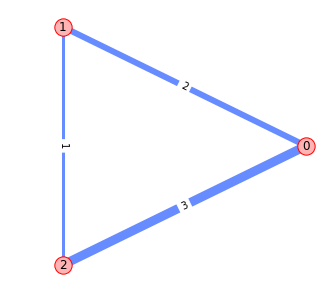

In [43]:
elabels={}
elabels = nx.get_edge_attributes(G,'weight')
edge_width=[G[u][v]['weight'] for u,v in G.edges()] 
edge_width=[3*w for w in edge_width]

figsize=(5,5)
pos=nx.circular_layout(G) 
node_color="#ffb3b3"
node_border_color="r"
edge_color="#668cff"
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color,width=edge_width)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels=elabels);
plt.axis('off');

<a id='5'></a>
## 5. Multigraphs

**Multigraphs are graphs in which a pair of nodes might hold more than one edge (multiple edges).**

In [44]:
# Select whether you want an undirected or directed multigraph 
# by commenting out the unwanted case:

# G = nx.MultiGraph()
G = nx.MultiDiGraph()

G.add_edges_from([(0,1),(1,2),(2,0),(0,1),(0,1),(1,2)])

print len(G.nodes()), 'nodes:', G.nodes() 
print len(G.edges()), 'edges:', G.edges(data=True)

print "Is G multigraph?", G.is_multigraph()
print "Is G weighted?", nx.is_weighted(G)
print "Is G directed?", G.is_directed()

3 nodes: [0, 1, 2]
6 edges: [(0, 1, {}), (0, 1, {}), (0, 1, {}), (1, 2, {}), (1, 2, {}), (2, 0, {})]
Is G multigraph? True
Is G weighted? False
Is G directed? True


### Converting a multigraph to a weighted graph and plotting it

3 nodes: [0, 1, 2]
3 edges: [(0, 1, {'weight': 3}), (1, 2, {'weight': 2}), (2, 0, {'weight': 1})]
Is Gw multigraph? False
Is Gw weighted? True
Is Gw directed? True
[(0, 1, {'weight': 3}), (1, 2, {'weight': 2}), (2, 0, {'weight': 1})]


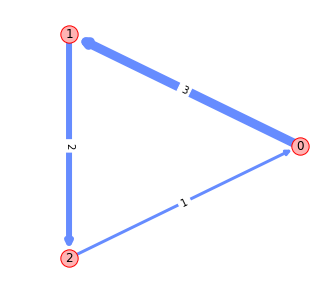

In [45]:
if G.is_directed()==False:
    weight={(x,y):v for (x, y), v in Counter(G.edges()).items()}
    w_edges=[(x,y,z) for (x,y),z in weight.items()]
    Gw = nx.Graph()
    Gw.add_weighted_edges_from(w_edges)
    edge_width=[Gw[u][v]['weight'] for u,v in Gw.edges()]
else:
    weight=[(x, y, {'weight': v}) for (x, y), v in Counter(G.edges()).items()]
    Gw = nx.DiGraph(weight)
    edge_width=[Gw[u][v]['weight'] for u,v in Gw.edges()] 

print len(Gw.nodes()), 'nodes:', Gw.nodes() 
print len(Gw.edges()), 'edges:', Gw.edges(data=True)

print "Is Gw multigraph?", Gw.is_multigraph()
print "Is Gw weighted?", nx.is_weighted(Gw)
print "Is Gw directed?", Gw.is_directed()

# elabels={}
elabels = nx.get_edge_attributes(Gw,'weight')
print weight
edge_width=[3*w for w in edge_width] 

figsize=(5,5)
pos=nx.circular_layout(Gw) 
node_color="#ffb3b3"
node_border_color="r"
edge_color="#668cff"
G=Gw
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color,width=edge_width)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels=elabels);
plt.axis('off');
# wpcplot(Gw,pos,node_color,edge_color,node_border_color,edge_width,elabels,figsize)

<a id='5.1'></a>
### 5.1 Random (gnm-based) UNDIRECTED Multigraphs

In [46]:
number_of_nodes = 10
number_of_edges = 25

# G=nx.gnm_random_graph(number_of_nodes,number_of_edges,directed=False)

while True:
    G=nx.gnm_random_graph(number_of_nodes,number_of_edges,directed=False) 
    if nx.number_connected_components(G)==1:
        break

print len(G.nodes()), 'nodes:', G.nodes() 
print len(G.edges()), 'edges' #:', G.edges(data=True)

if G.is_directed()==True:
    print "Directed graph"
else:
    print "Undirected graph"

10 nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
25 edges
Undirected graph


In [47]:
# Number of additional multiedges:
k=10

edges = list(G.edges())
for _ in range(k):
    e=random.choice(list(G.edges()))
    edges.append(e)

Gm = nx.MultiGraph()

Gm.add_edges_from(edges)

print len(Gm.nodes()), 'nodes:', Gm.nodes() 
print len(Gm.edges()), 'edges' #:', Gm.edges(data=True)

print "Is Gm multigraph?", Gm.is_multigraph()
print "Is Gm weighted?", nx.is_weighted(Gm)
print "Is Gm directed?", Gm.is_directed()

10 nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
35 edges
Is Gm multigraph? True
Is Gm weighted? False
Is Gm directed? False


Is Gw multigraph? False
Is Gw weighted? True
Is Gw directed? False
(4, 7) 1
(1, 3) 1
(6, 9) 1
(1, 6) 5
(3, 7) 1
(2, 5) 2
(5, 8) 2
(1, 2) 1
(2, 7) 2
(4, 5) 1
(1, 4) 2
(2, 3) 1
(1, 9) 1
(6, 8) 1
(0, 8) 2
(3, 5) 1
(0, 1) 1
(4, 6) 1
(7, 8) 1
(0, 2) 1
(0, 6) 1
(1, 8) 1
(0, 9) 1
(3, 4) 2
(2, 4) 1


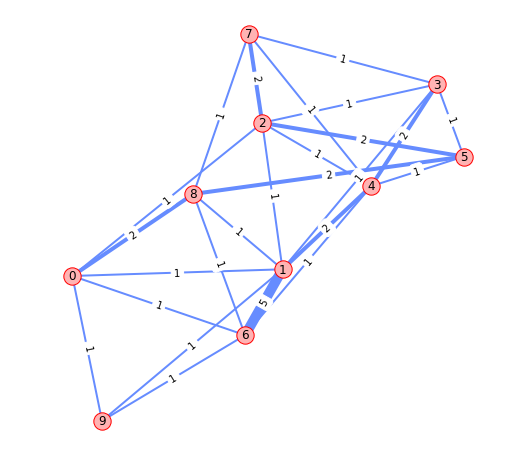

In [48]:
weight_d={(x,y):v for (x, y), v in Counter(Gm.edges()).items()}
w_edges=[(x,y,z) for (x,y),z in weight_d.items()]
Gw = nx.Graph()
Gw.add_weighted_edges_from(w_edges)
edge_width=[Gw[u][v]['weight'] for u,v in Gw.edges()]
elabels = nx.get_edge_attributes(Gw,'weight')
print "Is Gw multigraph?", Gw.is_multigraph()
print "Is Gw weighted?", nx.is_weighted(Gw)
print "Is Gw directed?", Gw.is_directed()
for k,v in elabels.items():
    print k,v

# elabels={}
edge_width=[2*w for w in edge_width] 

figsize=(8,8)
pos=nx.spring_layout(Gw) 
node_color="#ffb3b3"
node_border_color="r"
edge_color="#668cff"
G=Gw
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color,width=edge_width)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels=elabels);
plt.axis('off');
# wpcplot(Gw,pos,node_color,edge_color,node_border_color,edge_width,elabels,figsize)

<a id='5.2'></a>
### 5.2 Random (gnm-based) DIRECTED Multigraphs

In [49]:
number_of_nodes = 10
number_of_edges = 25

# G=nx.gnm_random_graph(number_of_nodes,number_of_edges,directed=True)

while True:
    G=nx.gnm_random_graph(number_of_nodes,number_of_edges,directed=True)        
    if nx.number_weakly_connected_components(G)==1:
        break

print len(G.nodes()), 'nodes:', G.nodes() 
print len(G.edges()), 'edges' #:', G.edges(data=True)

if G.is_directed()==True:
    print "Directed graph"
else:
    print "Undirected graph"

10 nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
25 edges
Directed graph


In [50]:
# Number of additional multiedges:
k=10

edges = list(G.edges())
for _ in range(k):
    e=random.choice(list(G.edges()))
    edges.append(e)

Gm = nx.MultiDiGraph()

Gm.add_edges_from(edges)

print len(Gm.nodes()), 'nodes:', Gm.nodes() 
print len(Gm.edges()), 'edges' #:', Gm.edges(data=True)

print "Is Gm multigraph?", Gm.is_multigraph()
print "Is Gm weighted?", nx.is_weighted(Gm)
print "Is Gm directed?", Gm.is_directed()

10 nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
35 edges
Is Gm multigraph? True
Is Gm weighted? False
Is Gm directed? True


In [51]:
Gm.graph['edge'] = {'arrowsize': '0.6', 'splines': 'curved'}
Gm.graph['graph'] = {'scale': '3'}
# for u,v,d in Gm.edges(data=True):
#     d['label'] = d.get('weight','')
A = to_agraph(Gm) 
A.layout('dot')                                                                 
A.draw('multi0_graphviz.png')

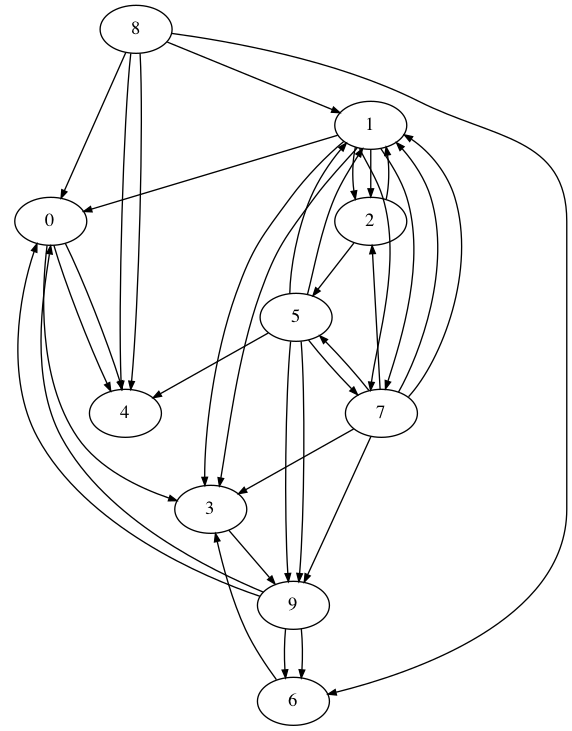

In [52]:
Image(filename = "multi0_graphviz.png") #, width=600, height=200)

Is Gw multigraph? False
Is Gw weighted? True
Is Gw directed? True
3 reciprocating edges: [(1, 2), (1, 7), (5, 7)]
(5, 9, {'weight': 2})
(1, 3, {'weight': 2})
(7, 3, {'weight': 1})
(8, 0, {'weight': 1})
(2, 1, {'weight': 1})
(5, 1, {'weight': 2})
(2, 5, {'weight': 1})
(0, 3, {'weight': 1})
(7, 2, {'weight': 1})
(1, 2, {'weight': 2})
(9, 0, {'weight': 2})
(8, 1, {'weight': 1})
(6, 3, {'weight': 1})
(0, 4, {'weight': 2})
(8, 6, {'weight': 1})
(5, 4, {'weight': 1})
(7, 1, {'weight': 2})
(7, 5, {'weight': 1})
(1, 0, {'weight': 1})
(9, 6, {'weight': 2})
(7, 9, {'weight': 1})
(5, 7, {'weight': 1})
(3, 9, {'weight': 1})
(1, 7, {'weight': 2})
(8, 4, {'weight': 2})


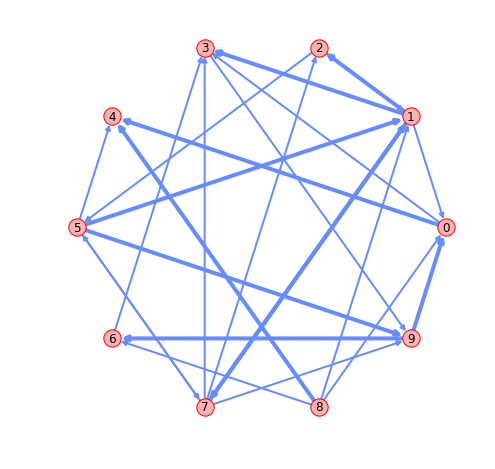

In [53]:
weight_l=[(x, y, {'weight': v}) for (x, y), v in Counter(Gm.edges()).items()]
Gw = nx.DiGraph(weight_l)
edge_width=[Gw[u][v]['weight'] for u,v in Gw.edges()]
elabels={}
print "Is Gw multigraph?", Gw.is_multigraph()
print "Is Gw weighted?", nx.is_weighted(Gw)
print "Is Gw directed?", Gw.is_directed()
rece=[]
for e in Gw.edges():
    if (e[1],e[0]) in Gw.edges():
        if (e[1],e[0]) not in rece:
            rece.append(e)
print len(rece), "reciprocating edges:", rece 
for i in weight_l:
    print i
         
edge_width=[2*w for w in edge_width]

figsize=(8,8)
pos=nx.circular_layout(Gw) 
node_color="#ffb3b3"
node_border_color="r"
edge_color="#668cff"
G=Gw
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color,width=edge_width)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels=elabels);
plt.axis('off');
# wpcplot(Gw,pos,node_color,edge_color,node_border_color,edge_width,elabels,figsize)

In [54]:
Gw.graph['edge'] = {'arrowsize': '0.6', 'splines': 'curved'}
Gw.graph['graph'] = {'scale': '3'}
for u,v,d in Gw.edges(data=True):
    d['label'] = d.get('weight','')
A = to_agraph(Gw) 
A.layout('dot')                                                                 
A.draw('multi1_graphviz.png')

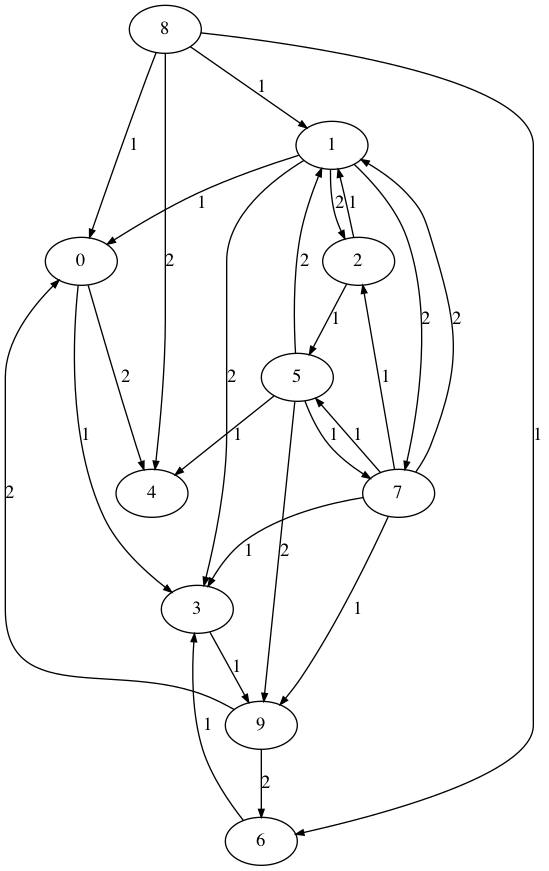

In [55]:
Image(filename = "multi1_graphviz.png") #, width=600, height=200)

<a id='6'></a>
## 6. Graph Isomorphisms

#### Petersen Graph

10 nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
15 edges


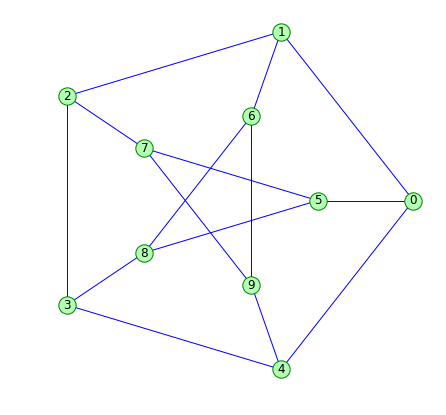

In [56]:
P=nx.petersen_graph()

print len(P.nodes()), 'nodes:', P.nodes() 
print len(P.edges()), 'edges' #:', P.edges(data=True)

figsize=(7,7)
pos=nx.shell_layout(P,nlist=[range(5,10), range(5)])
node_color="#b3ffb3" #"#ffb3b3"
node_border_color='g' #'r'
edge_color="b" #"#668cff"

G=P
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color)
# If you do not to display node labels, just comment off the following line:
nx.draw_networkx_labels(G, pos)
plt.axis('off');

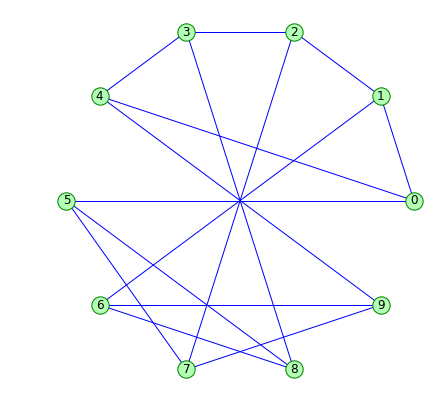

In [57]:
pos=nx.circular_layout(P)

figsize=(7,7)
node_color="#b3ffb3" #"#ffb3b3"
node_border_color='g' #'r'
edge_color="b" #"#668cff"

G=P
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color)
# If you do not to display node labels, just comment off the following line:
nx.draw_networkx_labels(G, pos)
plt.axis('off');

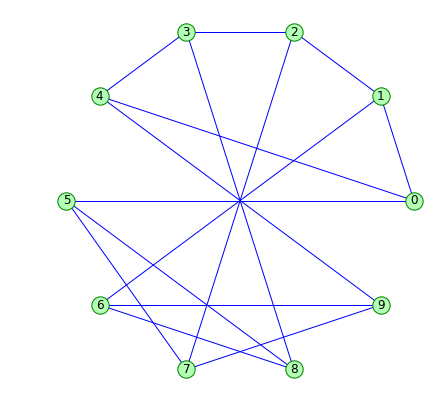

In [58]:
n=10
d=3
while True:
    G=nx.random_regular_graph(d, n)
#     G=nx.gnm_random_graph(number_of_nodes,number_of_edges,directed=False) 
    if nx.is_isomorphic(G,P):
        break

figsize=(7,7)
pos=nx.circular_layout(P)
node_color="#b3ffb3" #"#ffb3b3"
node_border_color='g' #'r'
edge_color="b" #"#668cff"

G=P
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color)
# If you do not to display node labels, just comment off the following line:
nx.draw_networkx_labels(G, pos)
plt.axis('off');

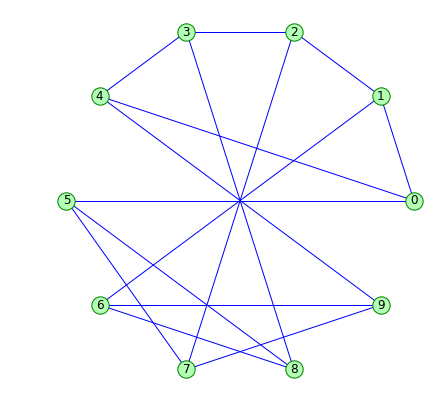

In [59]:
n=10
d=3
while True:
    G=nx.random_regular_graph(d, n)
#     G=nx.gnm_random_graph(number_of_nodes,number_of_edges,directed=False) 
    if nx.is_isomorphic(G,P)==False:
        break

figsize=(7,7)
pos=nx.circular_layout(P)
node_color="#b3ffb3" #"#ffb3b3"
node_border_color='g' #'r'
edge_color="b" #"#668cff"

G=P
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color)
# If you do not to display node labels, just comment off the following line:
nx.draw_networkx_labels(G, pos)
plt.axis('off');

#### Graphs with a given Degree Sequence

[4, 3, 6, 3, 4, 1, 1, 3, 3, 1, 2, 3, 1, 3, 2]

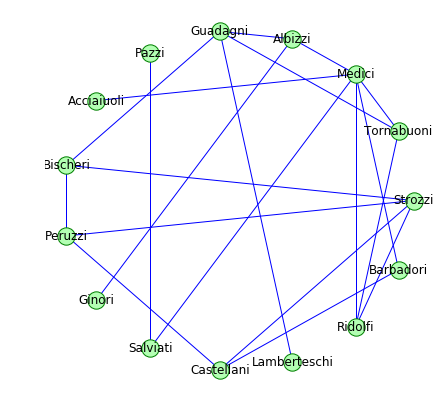

In [60]:
F=nx.florentine_families_graph()

figsize=(7,7)
pos=nx.circular_layout(F)
node_color="#b3ffb3" #"#ffb3b3"
node_border_color='g' #'r'
edge_color="b" #"#668cff"

G=F
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color)
# If you do not to display node labels, just comment off the following line:
nx.draw_networkx_labels(G, pos)
plt.axis('off');
ds=[d for n, d in F.degree()]  
ds

In [61]:
# while True:
#     G = nx.configuration_model(ds)
#     mapping = dict(zip(G.nodes(),F.nodes()))
#     H = nx.relabel_nodes(G, mapping)
#     if nx.is_isomorphic(H,F):
#         break

In [62]:
# nx.write_gpickle(G, "Florentine_iso.gpickle")

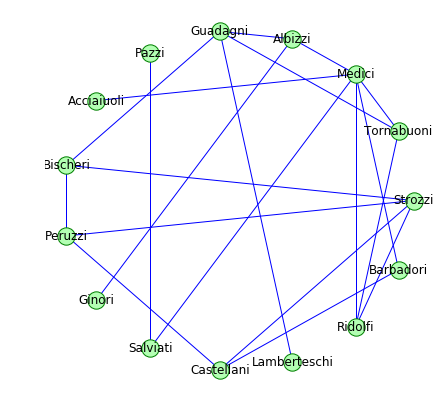

In [63]:
G = nx.read_gpickle("Florentine_iso.gpickle")
G.nodes()
mapping = dict(zip(G.nodes(),F.nodes()))
H = nx.relabel_nodes(G, mapping)
pos = nx.circular_layout(F)

figsize=(7,7)
pos=nx.circular_layout(F)
node_color="#b3ffb3" #"#ffb3b3"
node_border_color='g' #'r'
edge_color="b" #"#668cff"

G=F
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color)
# If you do not to display node labels, just comment off the following line:
nx.draw_networkx_labels(G, pos)
plt.axis('off');

ds=[d for n, d in H.degree()]  

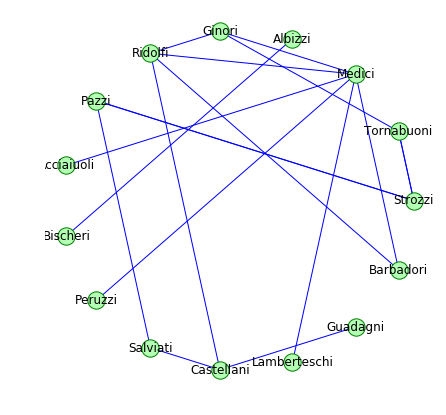

In [64]:
while True:
    G = nx.configuration_model(ds)
    mapping = dict(zip(G.nodes(),F.nodes()))
    H = nx.relabel_nodes(G, mapping)
    if nx.is_isomorphic(H,F)==False:
        break

figsize=(7,7)
pos=nx.circular_layout(H)
node_color="#b3ffb3" #"#ffb3b3"
node_border_color='g' #'r'
edge_color="b" #"#668cff"

G=H
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color)
# If you do not to display node labels, just comment off the following line:
nx.draw_networkx_labels(G, pos)
plt.axis('off');

[4, 3, 6, 3, 4, 1, 1, 3, 3, 1, 2, 3, 1, 3, 2]

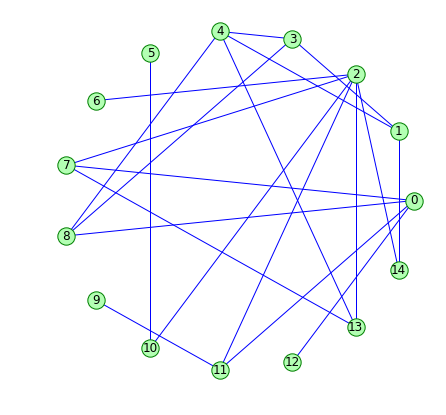

In [65]:
# sequence = nx.random_powerlaw_tree_sequence(20, tries=5000)
# G1 = nx.configuration_model(sequence)
# # actual_degrees = [d for v, d in G1.degree()]
# # print actual_degrees
# # actual_degrees == sequence
G1 = nx.read_gpickle("CM20.gpickle")

figsize=(7,7)
pos=nx.circular_layout(G1)
node_color="#b3ffb3" #"#ffb3b3"
node_border_color='g' #'r'
edge_color="b" #"#668cff"

G=G1
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color)
# If you do not to display node labels, just comment off the following line:
nx.draw_networkx_labels(G, pos)
plt.axis('off');

ds=[d for n, d in G1.degree()]  
ds

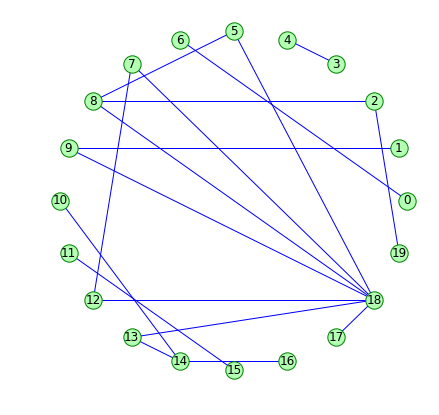

In [66]:
# while True:
#     G2 = nx.configuration_model(sequence)
#     if nx.is_isomorphic(G1,G2):
#         break
G2=nx.read_gpickle("CM20iso.gpickle")

figsize=(7,7)
pos=nx.circular_layout(G2)
node_color="#b3ffb3" #"#ffb3b3"
node_border_color='g' #'r'
edge_color="b" #"#668cff"

G=G2
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color)
# If you do not to display node labels, just comment off the following line:
nx.draw_networkx_labels(G, pos)
plt.axis('off');

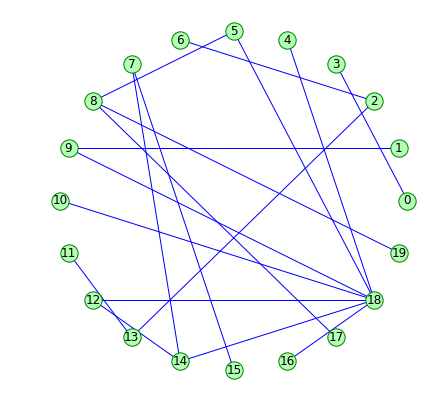

In [67]:
# while True:
#     G2n = nx.configuration_model(sequence)
#     if nx.is_isomorphic(G1,G2n)==False:
#         break
G2n=nx.read_gpickle("CM20noniso.gpickle")

figsize=(7,7)
pos=nx.circular_layout(G2n)
node_color="#b3ffb3" #"#ffb3b3"
node_border_color='g' #'r'
edge_color="b" #"#668cff"

G=G2n
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color)
# If you do not to display node labels, just comment off the following line:
nx.draw_networkx_labels(G, pos)
plt.axis('off');

In [68]:
# nx.write_gpickle(G, "CM20.gpickle")
# nx.write_gpickle(G2, "CM20iso.gpickle")
# nx.write_gpickle(G2n, "CM20noniso.gpickle")

[1, 4, 3, 1, 1, 1, 2, 1, 5, 1, 1, 2, 1, 3, 1]

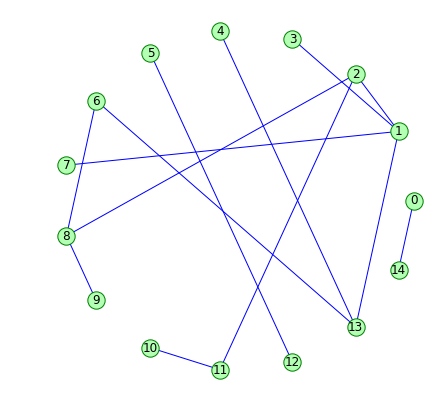

In [69]:
sequence = nx.random_powerlaw_tree_sequence(15, tries=5000)
G1 = nx.configuration_model(sequence)

figsize=(7,7)
pos=nx.circular_layout(G1)
node_color="#b3ffb3" #"#ffb3b3"
node_border_color='g' #'r'
edge_color="b" #"#668cff"

G=G1
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color)
# If you do not to display node labels, just comment off the following line:
nx.draw_networkx_labels(G, pos)
plt.axis('off');

ds=[d for n, d in G1.degree()]  
ds

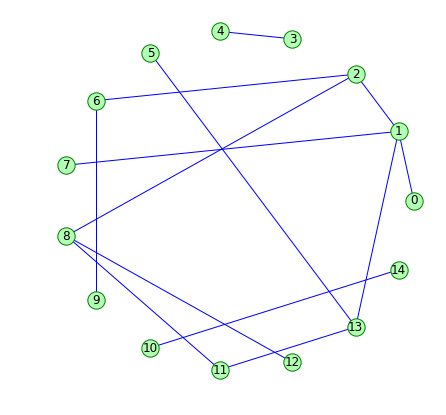

In [70]:
while True:
    G2 = nx.configuration_model(sequence)
    if nx.is_isomorphic(G1,G2):
        break

figsize=(7,7)
pos=nx.circular_layout(G2)
node_color="#b3ffb3" #"#ffb3b3"
node_border_color='g' #'r'
edge_color="b" #"#668cff"

G=G2
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color)
# If you do not to display node labels, just comment off the following line:
nx.draw_networkx_labels(G, pos)
plt.axis('off');

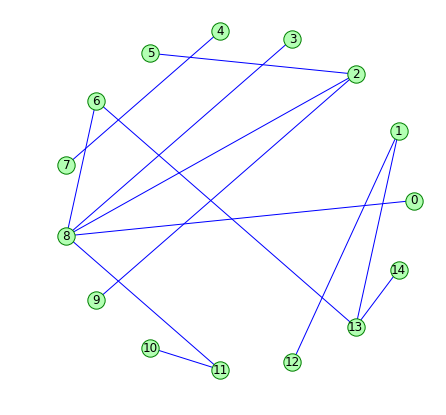

In [71]:
while True:
    G2 = nx.configuration_model(sequence)
    if nx.is_isomorphic(G1,G2)==False:
        break

figsize=(7,7)
pos=nx.circular_layout(G2)
node_color="#b3ffb3" #"#ffb3b3"
node_border_color='g' #'r'
edge_color="b" #"#668cff"

G=G2
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color)
# If you do not to display node labels, just comment off the following line:
nx.draw_networkx_labels(G, pos)
plt.axis('off');